# CS178 Homework 5

## Due Friday, December 8th, 2023

---
## Instructions


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Clustering Iris Data (55 points)
    - Problem 1.1: Data Points (5 points)
    - Problem 1.2: K-Means Clustering (15 points)
    - Problem 1.3: K-Means++ Initialization (10 points)
    - Problem 1.4: Selecting a Clustering (5 points)
    - Problem 1.5: Agglomerative Clustering (15 points)
    - Problem 1.5: Analysis (5 points)
- Problem 2: EigenFaces (35 points)
    - Problem 2.1: Preprocessing (10 points)
    - Problem 2.2: Eigendecomposition (10 points)
    - Problem 2.3: Reconstruction (15 points)
    - Problem 2.4: Visualizing (5 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any codes we give you below, except for those waiting for you to complete. This is to ensure your code has reproducible results and is important for grading.**

In [111]:
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.inspection import DecisionBoundaryDisplay

plt.set_cmap('nipy_spectral');

import scipy.linalg

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

<Figure size 640x480 with 0 Axes>

--- 
## Problem 1

In this problem you will experiment with two clustering algorithms implemented in ``scikit-learn``: k-means and agglomerative clustering. 

Let's also load in some data that we will use for the tests in Problem 1. Here, we are using the Iris dataset, where we're only using the first two features. Although you typically would split your data into a training set and a testing set, we won't do that here because we are only using this data to illustrate clustering.

In [112]:
# Load the Iris dataset
X, y = load_iris(return_X_y = True)
# Only use the first two features
X = X[:, :2]

### Problem 1.1: Data Points (10 points):
First, plot the Iris data features ``X``, and see how "clustered" you think it looks.  How many clusters do you think there should be for these data?

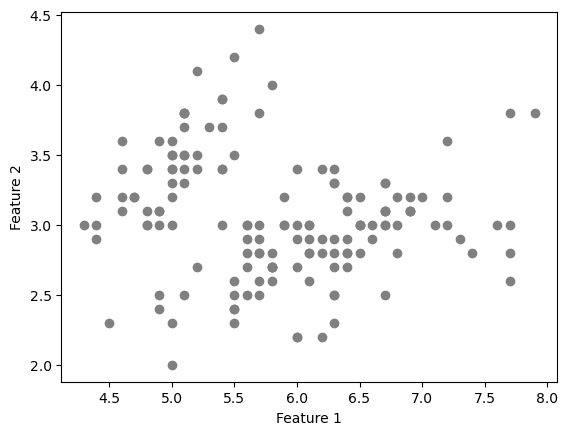

In [113]:
plt.scatter(X[:,0], X[:,1], c=[(.5,.5,.5)])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

I think there should be around 5 clusters for this data because two for the left top corner, one for left down and two for middle and right middle.

### Problem 1.2: K-Means Clustering (15 points):
Run k-means clustering on the data ``X``, for several choices of $k$: $k \in \{2,5,20\}$.  Use the basic ``random`` initialization.  *Manually* fit at least 5 different initializations followed by the k-means algorithm (i.e., run the function ``.fit(X)`` at least 5 times with different random seeds), and for each one, check and compare their cluster quality (either visually by plotting, or by comparing the total distortion via ``score``).  

*Note:* it is not usually helpful to compare the cluster labels assigned to the data, since the identity of the each cluster (its index, $0\ldots k-1$) is not important -- only which data have been assigned to the same cluster.

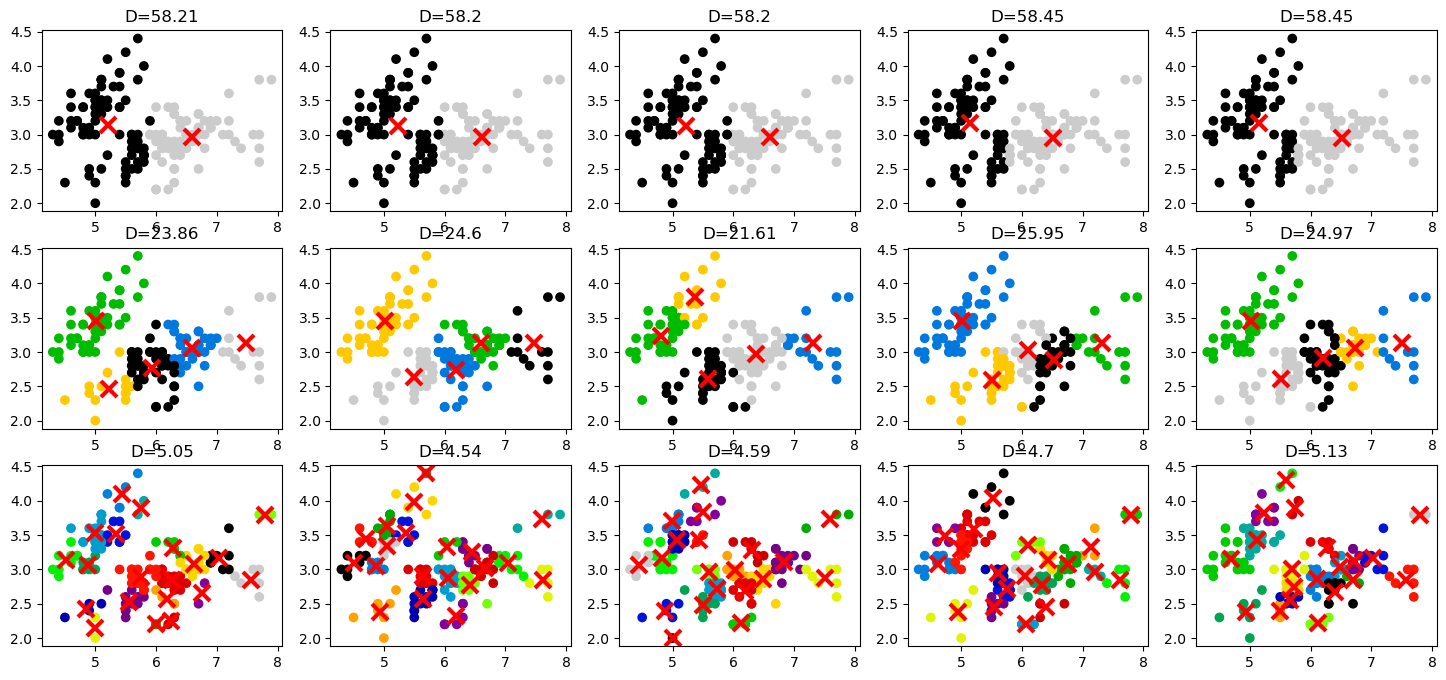

In [114]:
fig, ax = plt.subplots(3,5, figsize=(18,8))

for j,k in enumerate([2,5,20]):
    for i in range(5):
        # use random_state = seed*k + i
        clust = KMeans(n_clusters=k, init='random', n_init=1, random_state=seed*k + i)
        # ... YOUR CODE GOES HERE
        clust.fit(X)
        ax[j,i].scatter(X[:,0], X[:,1], c=clust.predict(X))
        ax[j,i].plot(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],'rx',ms=12,mew=3)
        ax[j,i].set_title(f'D={np.round(clust.inertia_,2)}')

### Problem 1.3: K-Means++ Initialization (10 points):
Run a single initialization and fit using the ``k++`` initialization technique.  Compare the resulting clustering to those in the previous problem, both visually and by score.

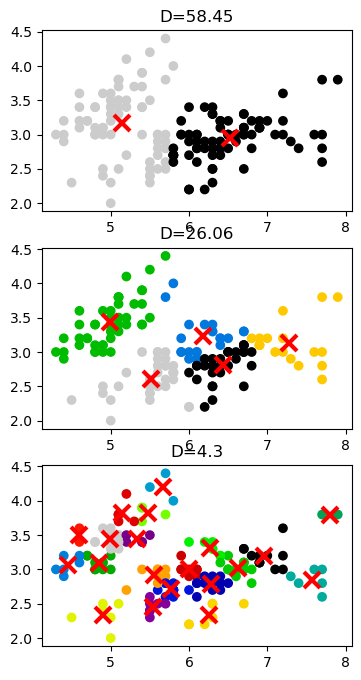

In [115]:
fig, ax = plt.subplots(3,1, figsize=(4,8))

for j,k in enumerate([2,5,20]):
    for i in range(1):
        # again, use random_state = seed*k + i
        # YOUR CODE GOES HERE
        clust = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=seed*k + i)
        clust.fit(X)
        ax[j].scatter(X[:,0], X[:,1], c=clust.predict(X))
        ax[j].plot(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],'rx',ms=12,mew=3)
        ax[j].set_title(f'D={np.round(clust.inertia_,2)}')
        

### Problem 1.4: Selecting a Clustering (5 points):
Select the best clustering (by ``score``) and display the data (``scatter``) colored by their cluster membership, along with the cluster centers (as ``X`` markers).  (You can get the closest assigned cluster via ``predict``.)

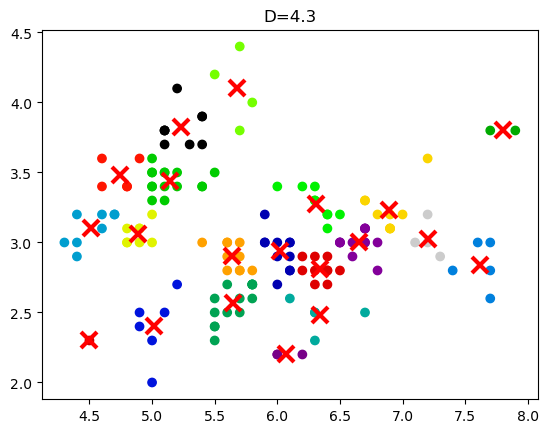

In [116]:
k = 20
clust = KMeans(n_clusters=k, random_state=seed)
clust.fit(X)
plt.scatter(X[:,0], X[:,1], c=clust.predict(X))
plt.plot(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],'rx',ms=12,mew=3)
plt.title(f'D={np.round(clust.inertia_,2)}')
plt.show()

As a note, clustering that can be extended to out-of-sample points, such as k-means, can provide a useful construction of additional features for downstream supervised learning.  The ``transform`` function in the k-means class uses distance to the various clusters as a feature transform, which can replace or augment the original features for a learner.

### Problem 1.5: Agglomerative Clustering (15 points)

Now use heirarchical aggolomerative clustering to find groupings of the data into 5 clusters (the middle value from the k-means exercise), under different definitions of the "cluster distance": ``single`` linkage (nearest pair of points), ``ward`` (mean distance, distance between the means of the clusters), and ``complete`` linkage (furthest pair of points).  Use the usual Euclidean distance as the dissimilarity metric (``metric = 'euclidean'``).


Note that, unlike k-means, the agglomerative clustering procedure is not easily applied to out-of-sample points, meaning that, given a new location $x$, it is not always clear which cluster it should belong to.  (In k-means, we can simply select the nearest cluster center.)  In ``sklearn``, this is reflected in the fact that there is no ``predict`` function (to apply the learned clustering to out-of-sample data points); you can access the cluster assignments of the data used during clustering as ``labels_``, or call ``fit_predict`` (which fits and provides the prediction on the data used for fitting).

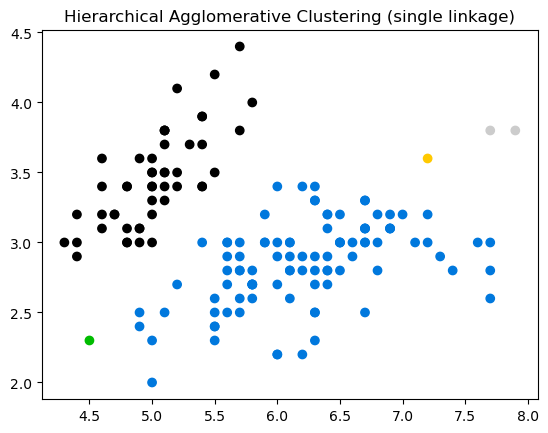

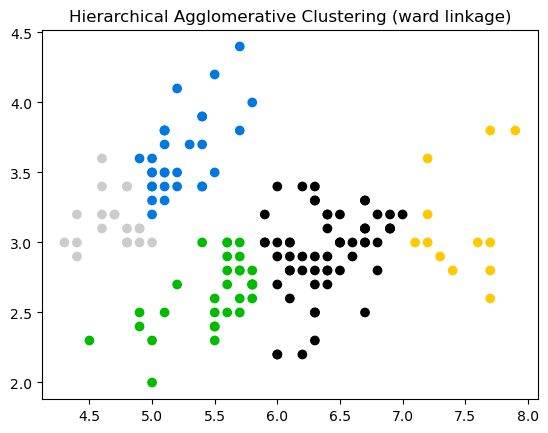

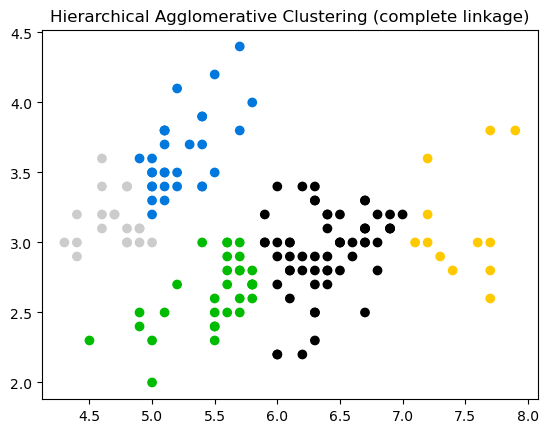

In [117]:
single_agglomerative = AgglomerativeClustering(n_clusters=5, linkage='single', affinity='euclidean')
single_agg = single_agglomerative.fit_predict(X)

ward_agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ward_agg = ward_agglomerative.fit_predict(X)

complete_agglomerative = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean')
complete_agg = complete_agglomerative.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=single_agg)
plt.title(f'Hierarchical Agglomerative Clustering (single linkage)')
plt.show()


# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=ward_agg)
plt.title(f'Hierarchical Agglomerative Clustering (ward linkage)')
plt.show()


# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=complete_agg)
plt.title(f'Hierarchical Agglomerative Clustering (complete linkage)')
plt.show()

### Problem 1.6: Analysis (5 points)

**Compare** the results of the three clusterings you obtained via agglomerative clustering to the clusterings you obtained from k-means.  Do any seem better, or worse, and why?

**Why** do we not run agglomerative clustering multiple times, as we did with k-means?

Agglomerative clustering seems better than k-mean clustering because k-mean initialize the clusters in random and converge to local minimum. However, sometimes they can be close to each other.
On the other hand, Agglomerative clustering, they initialize clusters at each instance and cluster through single, complete, or ward linkage.
Ward and complete linkage works pretty well but single performs worse.

We do not need to run agglomerative clustering multiple times because it uses dendrogram to cluster based on the rule of linkage and step back to decide how many clusters we will have. So it does not required to iterate a lot of times like k-mean because it dost not need to find local minimum.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

## Problem 2: PCA



In this problem, we will do a little exploration of the faces dataset, and PCA representations for smoothing or compressing high-dimensional data.  First, let's load the Viola-Jones face data:

In [118]:
url = 'https://www.ics.uci.edu/~ihler/classes/cs178/data/faces.txt'

with requests.get(url) as link: X = np.genfromtxt(StringIO(link.text),delimiter=None)

There are 4196 faces, sized 24x24 = 576 pixels each.

To display faces, we can use ``imshow``; since these images are grayscale only, we use a gray colormap. and specify the range of values in that colormap (``vmin, vmax``) so that the contrast is not adjusted automatically in the display function.  For example, we can look at five faces:

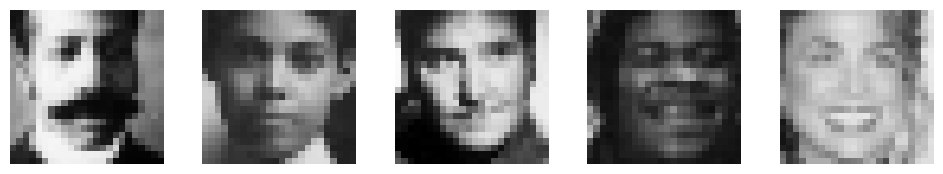

In [119]:
fig,ax = plt.subplots(1,5, figsize=(12,2));
for a,i in enumerate([1,5,30,50,100]):
    ax[a].imshow(X[i,:].reshape(24,24).T, cmap="gray", vmin=0,vmax=255); 
    ax[a].axis('off')

### Problem 2.1: Preprocessing (10 points)

First, find the "mean face" (average over the 5000 faces), and display it.  Remove this mean vector from the data to obtain a zero-centered data set ``XO``:

(-0.5, 23.5, 23.5, -0.5)

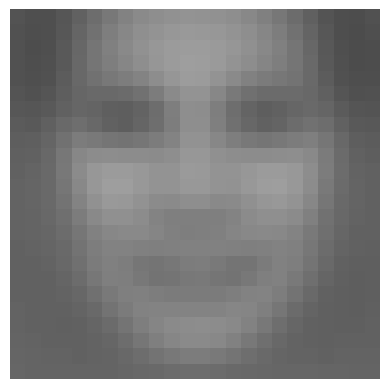

In [120]:
mean_face = np.mean(X, axis= 0)
plt.imshow(mean_face.reshape(24,24).T, cmap='gray', vmin=0, vmax=255)
X0 = X-mean_face
plt.axis('off')


### Problem 2.2: EigenDecomposition (10 points)

Now, use ``scipy.linalg.svd`` to compute the singular value decomposition,
$$ X0 = U \odot S \odot V^T = Z \odot V^T$$
where $U$, $V^T$ are unitary (orthogonal) matrices, so that $U \odot U^T = V^T \odot V = I$, and $S$ is diagonal.

(Note that ``svd`` returns $V^T$ as an output, rather than $V$.)

We define $Z=U \odot S$ for convenience.

In [121]:
U,S,V = scipy.linalg.svd(X,False)
Z = U.dot(np.diag(S))

### Problem 2.3: Reconstructions (15 points)
Compute the reconstruction of faces 5 and 30 using only the top $k$ eigenvectors, where $k \in \{5,10,50,100,200\}$.  For each reconstruction, what is the distortion (mean squared error between the pixels in the original image $x^{(i)}$ and the reconstructed image $\hat x^{(i)}$)?

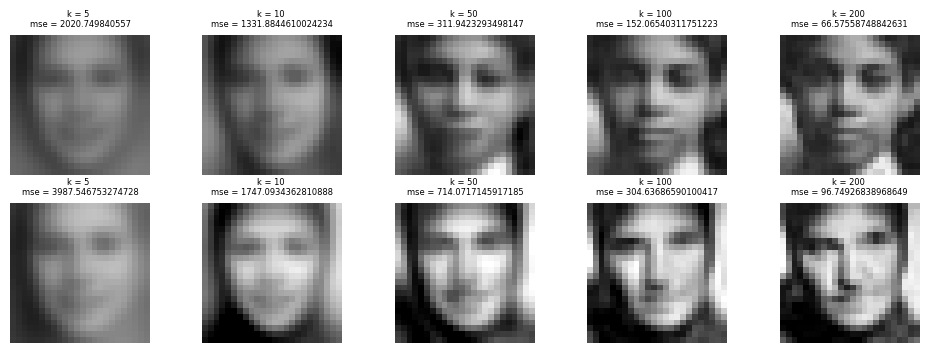

In [122]:
# Reconstruct two faces using a few components
fig,ax = plt.subplots(2,5, figsize=(12,4));
row = 0
for i in [5,30]:
    for j,k in enumerate([5,10,50,100,200]):
        # YOUR CODE GOES HERE
        reconstruction = Z[i,:k].dot(V[:k, :])
        mse = np.mean((reconstruction - X[i,:]) ** 2)
        ax[row,j].imshow(reconstruction.reshape(24,24).T, cmap='gray', vmin=0, vmax=255)
        ax[row,j].axis('off')
        ax[row,j].set_title(f'k = {k} \nmse = {mse}', fontsize= 6)
    row += 1
        
        


### Problem 2.4: Visualizing the latent space (5 points)

We can create a scatterplot of the faces in their latent position $z$ (the rows of the matrix $W$ in SVD, or $U$ to remove the scaling effect of $S$) to visualize how the data change across the space.  **Run** the following (provided) code to do so, and **comment on the  axes found** for the layout of images.  (You should have found the same first and second principal components I showed in lecture on these data; so your scatter plot should be comparable to the one I showed and discussed.) 

-1.0547785476404559


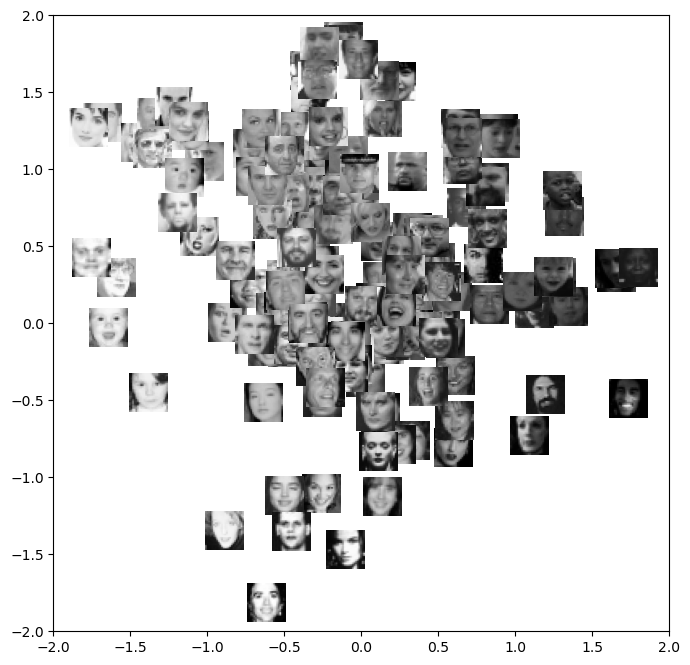

In [123]:
# Let's plot some of the faces and see what the first two dimensions look like... 
np.random.seed(1234)
idx = np.floor( 4916*np.random.rand(150) ); # pick some data
idx = idx.astype('int')

plt.figure(figsize=(8,8))

scale = 190  # need to choose an appropriate scale, compare to the axes & "extent" used for the image display
print(U[i,0]*75)
for i in idx:
    loc = (scale*U[i,0]+ 2.5,scale*U[i,0]+2.75, 50*U[i,1] + 0.25,50*U[i,1]+0.5)
    plt.imshow(np.reshape(X[i,:],(24,24)).T , cmap="gray", extent=loc , vmin=0,vmax=255);
    plt.axis( (-2,2,-2,2) )

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. If you did not collaborate with anyone, you should write something like "I completed this assignment without any collaboration."

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

Lucas Balvedere